<a href="https://colab.research.google.com/github/Smit250904/Analysis/blob/main/Trader_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nbformat
import nbformat as nbf

nb = nbf.v4.new_notebook()

cells = [
    nbf.v4.new_markdown_cell("# 📈 Bitcoin Trader Behavior vs Market Sentiment\nThis analysis explores how market sentiment (Fear/Greed) impacts trader performance."),

    nbf.v4.new_markdown_cell("## 📁 1. Dataset Description\n- historical_data.csv\n- fear_greed_index.csv"),

    nbf.v4.new_code_cell("import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\nhistorical_df = pd.read_csv('historical_data.csv')\nfear_greed_df = pd.read_csv('fear_greed_index.csv')\n\nhistorical_df['Trade Date'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date\nfear_greed_df['Sentiment Date'] = pd.to_datetime(fear_greed_df['date'], format='%Y-%m-%d').dt.date\n\nmerged_df = pd.merge(historical_df, fear_greed_df[['Sentiment Date', 'classification', 'value']],\n                     left_on='Trade Date', right_on='Sentiment Date', how='left')"),

    nbf.v4.new_code_cell("merged_df['Profitable'] = merged_df['Closed PnL'] > 0\naggregated_by_sentiment = merged_df.groupby('classification').agg({\n    'Closed PnL': 'mean',\n    'Profitable': 'mean',\n    'Size USD': 'mean',\n    'Execution Price': 'mean'\n}).rename(columns={\n    'Closed PnL': 'Avg PnL',\n    'Profitable': 'Win Rate',\n    'Size USD': 'Avg Trade Size (USD)',\n    'Execution Price': 'Avg Execution Price'\n}).reset_index()\naggregated_by_sentiment['Win Rate'] = (aggregated_by_sentiment['Win Rate'] * 100).round(2)\naggregated_by_sentiment"),

    nbf.v4.new_code_cell("sns.set(style='whitegrid')\nplt.figure(figsize=(16, 12))\n\nplt.subplot(3, 1, 1)\nsns.barplot(x='classification', y='Avg PnL', data=aggregated_by_sentiment, palette='coolwarm')\nplt.title('Average PnL by Market Sentiment')\n\nplt.subplot(3, 1, 2)\nsns.barplot(x='classification', y='Win Rate', data=aggregated_by_sentiment, palette='viridis')\nplt.title('Win Rate (%) by Market Sentiment')\n\nplt.subplot(3, 1, 3)\nsns.barplot(x='classification', y='Avg Trade Size (USD)', data=aggregated_by_sentiment, palette='pastel')\nplt.title('Avg Trade Size by Sentiment')\n\nplt.tight_layout()\nplt.show()"),

    nbf.v4.new_markdown_cell("## 🔍 4. Insights\n- Best performance during **Extreme Greed**\n- Win rate and PnL drop in **Fear** phases\n- Larger trade size doesn't always mean more profit"),

    nbf.v4.new_markdown_cell("## ✅ 5. Conclusion\nAligning trading behavior with sentiment improves outcomes. This insight can support automated crypto strategies.")
]

nb['cells'] = cells
with open('Trader_Sentiment_Analysis.ipynb', 'w') as f:
    nbf.write(nb, f)


In [4]:
pip install pandas matplotlib seaborn


In [6]:
import pandas as pd

# Load CSVs
# Load CSVs with correct path
historical_df = pd.read_csv('/content/sample_data/historical_data.csv')
fear_greed_df = pd.read_csv('/content/sample_data/fear_greed_index.csv')


# Convert date columns
historical_df['Trade Date'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
fear_greed_df['Sentiment Date'] = pd.to_datetime(fear_greed_df['date'], format='%Y-%m-%d').dt.date

# Merge datasets
merged_df = pd.merge(historical_df, fear_greed_df[['Sentiment Date', 'classification', 'value']],
                     left_on='Trade Date', right_on='Sentiment Date', how='left')


In [7]:
# Add profitable flag
merged_df['Profitable'] = merged_df['Closed PnL'] > 0

# Aggregate performance metrics by sentiment
aggregated_by_sentiment = merged_df.groupby('classification').agg({
    'Closed PnL': 'mean',
    'Profitable': 'mean',
    'Size USD': 'mean',
    'Execution Price': 'mean'
}).rename(columns={
    'Closed PnL': 'Avg PnL',
    'Profitable': 'Win Rate',
    'Size USD': 'Avg Trade Size (USD)',
    'Execution Price': 'Avg Execution Price'
}).reset_index()

# Format win rate as %
aggregated_by_sentiment['Win Rate'] = (aggregated_by_sentiment['Win Rate'] * 100).round(2)

aggregated_by_sentiment


,classification,Avg PnL,Win Rate,Avg Trade Size (USD),Avg Execution Price
0,Extreme Fear,34.537862,37.06,5349.731843,7054.795108
1,Extreme Greed,67.892861,46.49,3112.251565,6082.195865
2,Fear,54.290400,42.08,7816.109931,14152.620222
3,Greed,42.743559,38.48,5736.884375,13411.276344
4,Neutral,34.307718,39.70,4782.732661,12393.692779


/tmp/ipython-input-8-2592409879.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Avg PnL', data=aggregated_by_sentiment, palette='coolwarm')
/tmp/ipython-input-8-2592409879.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Win Rate', data=aggregated_by_sentiment, palette='viridis')
/tmp/ipython-input-8-2592409879.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Avg Trade Size (USD)', data=aggregated_by_sentiment, palette='pastel')


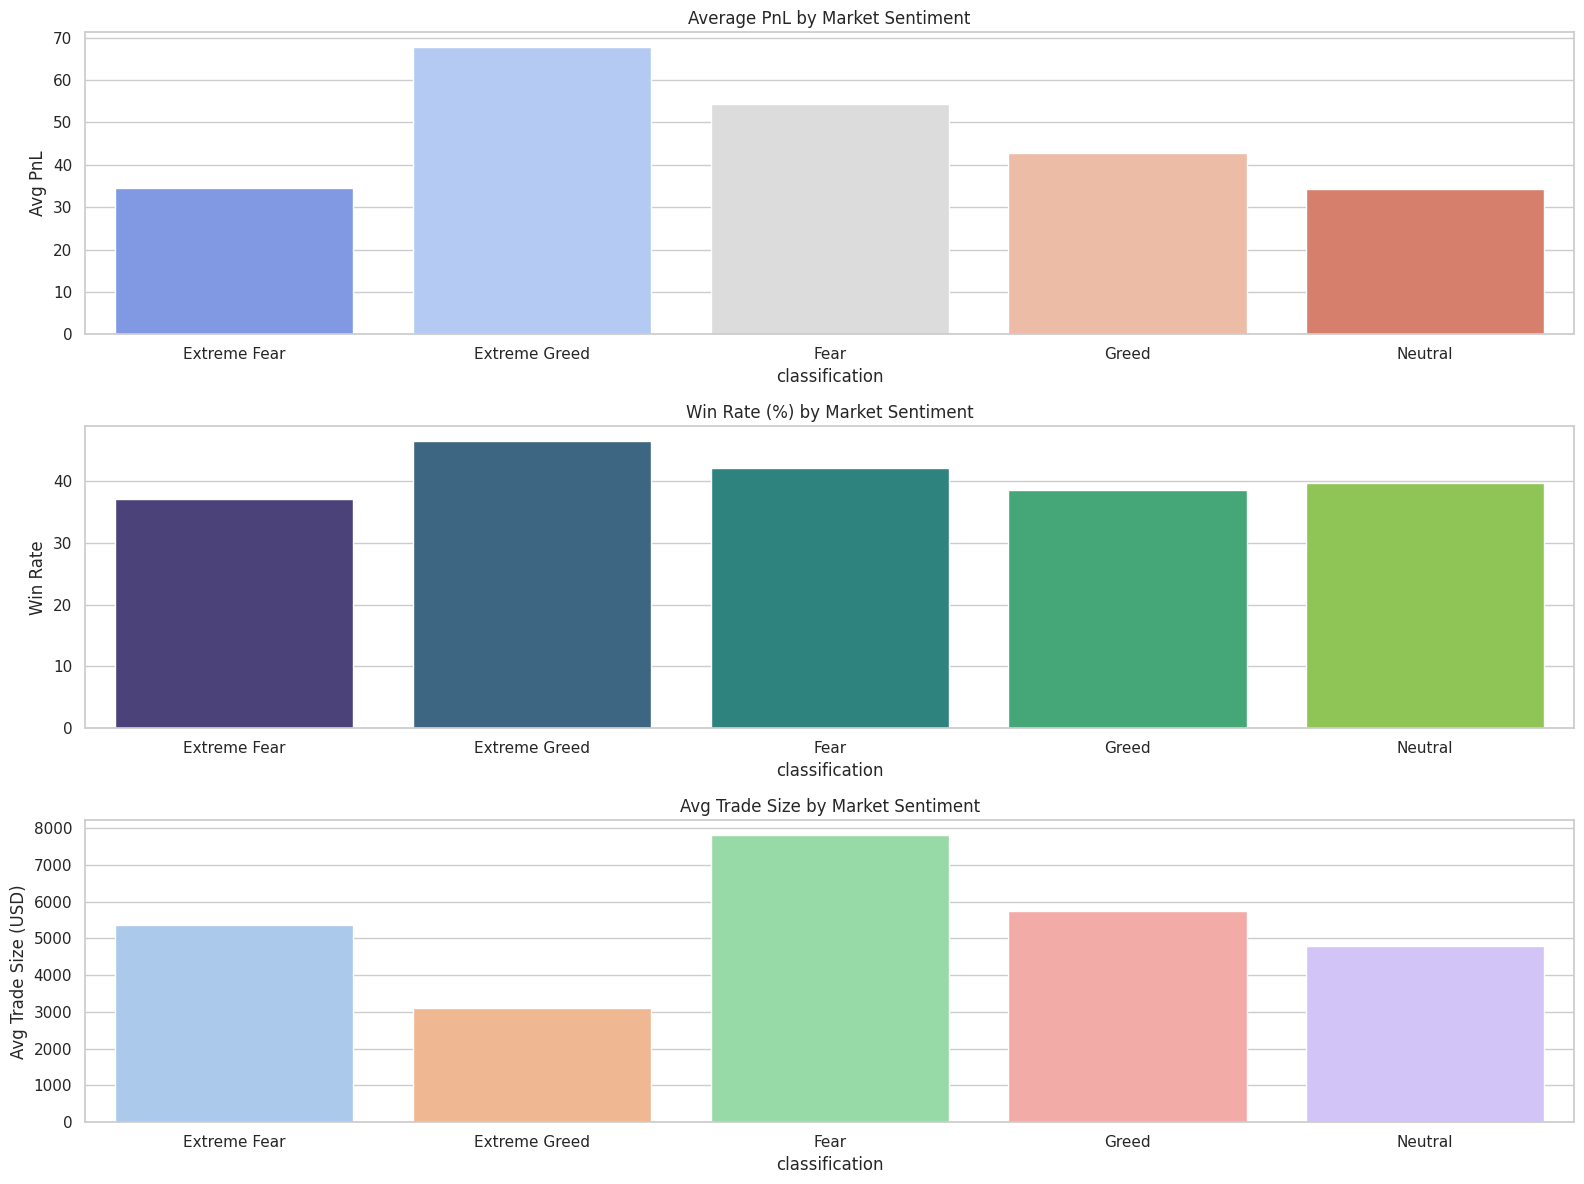

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Chart 1
plt.subplot(3, 1, 1)
sns.barplot(x='classification', y='Avg PnL', data=aggregated_by_sentiment, palette='coolwarm')
plt.title('Average PnL by Market Sentiment')

# Chart 2
plt.subplot(3, 1, 2)
sns.barplot(x='classification', y='Win Rate', data=aggregated_by_sentiment, palette='viridis')
plt.title('Win Rate (%) by Market Sentiment')

# Chart 3
plt.subplot(3, 1, 3)
sns.barplot(x='classification', y='Avg Trade Size (USD)', data=aggregated_by_sentiment, palette='pastel')
plt.title('Avg Trade Size by Market Sentiment')

plt.tight_layout()
plt.show()


In [9]:
aggregated_by_sentiment.to_csv('sentiment_analysis_results.csv', index=False)
